In [251]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [252]:
df=pd.read_csv('loan_data.csv')

In [253]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [255]:
df['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

In [256]:
df.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [257]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [258]:
Purpose_dummies=pd.get_dummies(df.purpose)

In [259]:
Purpose_dummies.isna().sum()

all_other             0
credit_card           0
debt_consolidation    0
educational           0
home_improvement      0
major_purchase        0
small_business        0
dtype: int64

In [260]:
loandf=df.drop('purpose',axis=1)
loandf.isna().sum()

credit.policy        0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [261]:
loandf=pd.concat([loandf,Purpose_dummies],axis=1)
loandf.rename(columns={"not.fully.paid":"not_fully_paid","int.rate":"int_rate","log.annual.inc":"log_annual_inc","days.with.cr.line":"days_with_cr_line","revol.bal":"revol_bal","revol.util":"revol_util",
                      "inq.last.6mths":"inq_last_6mths","delinq.2yrs":"delinq_2yrs","pub.rec":"pub_rec","credit.policy":"credit_policy"},inplace=True)

In [262]:
loandf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit_policy       9578 non-null   int64  
 1   int_rate            9578 non-null   float64
 2   installment         9578 non-null   float64
 3   log_annual_inc      9578 non-null   float64
 4   dti                 9578 non-null   float64
 5   fico                9578 non-null   int64  
 6   days_with_cr_line   9578 non-null   float64
 7   revol_bal           9578 non-null   int64  
 8   revol_util          9578 non-null   float64
 9   inq_last_6mths      9578 non-null   int64  
 10  delinq_2yrs         9578 non-null   int64  
 11  pub_rec             9578 non-null   int64  
 12  not_fully_paid      9578 non-null   int64  
 13  all_other           9578 non-null   uint8  
 14  credit_card         9578 non-null   uint8  
 15  debt_consolidation  9578 non-null   uint8  
 16  educat

In [263]:
loandf.shape[0], len(loandf['credit_policy'].values)


(9578, 9578)

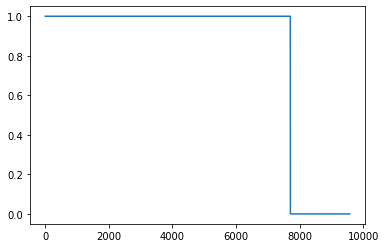

In [264]:
#This plot shows that the dataset is clearly imbalanced
plt.plot(range(0,loandf.shape[0]),loandf['credit_policy'].values)

In [265]:
#SMOTE Technique applied on minority class
#SMOTE- Synthetic Minority OverSampling Technique
import imblearn
oversample=imblearn.over_sampling.SMOTE()

In [266]:
X=loandf.drop('credit_policy',axis=1)
y=loandf['credit_policy']
X,y=oversample.fit_resample(X,y)

In [267]:
X.shape,y.shape

((15420, 19), (15420,))

In [268]:
y.value_counts()

1    7710
0    7710
Name: credit_policy, dtype: int64

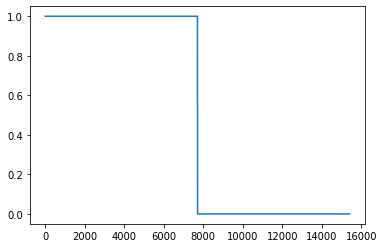

In [269]:
plt.plot(range(0,y.shape[0]),y.values)

In [270]:
loandf=pd.concat([X,y],axis=1)


In [271]:
import statsmodels.formula.api as sm
formula = 'credit_policy~' + "+".join(X.columns)
formula

'credit_policy~int_rate+installment+log_annual_inc+dti+fico+days_with_cr_line+revol_bal+revol_util+inq_last_6mths+delinq_2yrs+pub_rec+not_fully_paid+all_other+credit_card+debt_consolidation+educational+home_improvement+major_purchase+small_business'

In [272]:
lire = sm.ols(formula=formula, data=loandf).fit()

In [273]:
lire.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          credit_policy   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1113.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        04:53:18   Log-Likelihood:                -4528.5
No. Observations:               15420   AIC:                             9097.
Df Residuals:                   15400   BIC:                             9250.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6484      0.116    -22.822      0.000      -2.876      -2.421
int_rate              -1.0541      0.166     -6.366      0.000      -1.379      -0.730
installment            0.0001   1.73e-05      7.090      0.000    8.88e-05       0.000
log_annual_inc         0.0456      0.005      8.383      0.000       0.035       0.056
dti                   -0.0002      0.000     -0.399      0.690      -0.001       0.001
fico                   0.0036      0.000     27.902      0.000       0.003       0.004
days_with_cr_line   3.847e-06   1.23e-06      3.137      0.002    1.44e-06    6.25e-06
revol_bal          -1.984e-06   6.26e-08    -31.709      0.000   -2.11e-06   -1.86e-06
revol_util             0.0011      0.000      9.391      0.000       0.001       0.001
inq_last_6mths        -0.0571      0.001    -53.527      0.000      -0.059      -0.055
delinq_2yrs            0.0165      0.005      3.239      0.001       0.007       0.026
pub_rec                0.0651      0.012      5.574      0.000       0.042       0.088
not_fully_paid         0.0180      0.008      2.275      0.023       0.002       0.033
all_other              0.4224      0.009     49.474      0.000       0.406       0.439
credit_card            0.4890      0.011     45.878      0.000       0.468       0.510
debt_consolidation     0.4439      0.007     60.011      0.000       0.429       0.458
educational            0.4843      0.018     26.983      0.000       0.449       0.519
home_improvement       0.5002      0.014     34.982      0.000       0.472       0.528
major_purchase         0.5337      0.017     32.005      0.000       0.501       0.566
small_business         0.5326      0.014     36.833      0.000       0.504       0.561
==============================================================================
Omnibus:                      412.832   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.035
Skew:                          -0.414   Prob(JB):                     1.40e-97
Kurtosis:                       3.091   Cond. No.                     3.84e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [274]:
lire.pvalues[lire.pvalues>0.05]

dti    0.69025
dtype: float64

In [275]:
#This shows that feature 'dti','not_fully_paid' is not significantly correlated to label "credit_policy", So we can drop 
# the feature "dti","not_fully_paid"

In [276]:
loandf=loandf.drop(["dti","not_fully_paid"],axis=1)

<AxesSubplot:>

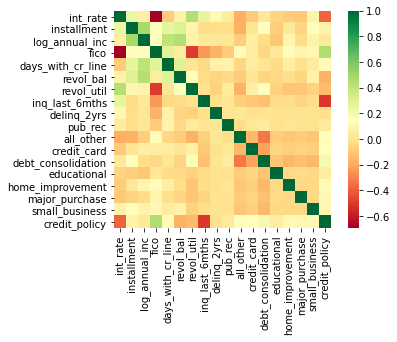

In [277]:
sns.heatmap(loandf.iloc[:,:].corr(), square=True, cmap='RdYlGn')

In [278]:
loandf.columns

Index(['int_rate', 'installment', 'log_annual_inc', 'fico',
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths',
       'delinq_2yrs', 'pub_rec', 'all_other', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement',
       'major_purchase', 'small_business', 'credit_policy'],
      dtype='object')

<AxesSubplot:>

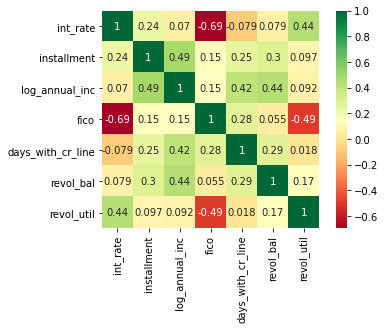

In [279]:
sns.heatmap(loandf.iloc[:,0:7].corr(),square=True,cmap='RdYlGn',annot=True)

In [280]:
#as seen from the above heatmap, there are no considerably highly correlated features, So retaining all of them

In [281]:
X=loandf.drop('credit_policy',axis=1)

In [282]:
formula = 'credit_policy~' + "+".join(X.columns)
formula

'credit_policy~int_rate+installment+log_annual_inc+fico+days_with_cr_line+revol_bal+revol_util+inq_last_6mths+delinq_2yrs+pub_rec+all_other+credit_card+debt_consolidation+educational+home_improvement+major_purchase+small_business'

In [283]:
lire = sm.ols(formula=formula, data=loandf).fit()
lire.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          credit_policy   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1243.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        04:53:19   Log-Likelihood:                -4531.2
No. Observations:               15420   AIC:                             9098.
Df Residuals:                   15402   BIC:                             9236.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -2.6297      0.116    -22.736      0.000      -2.856      -2.403
int_rate              -1.0640      0.164     -6.484      0.000      -1.386      -0.742
installment            0.0001   1.73e-05      7.302      0.000    9.22e-05       0.000
log_annual_inc         0.0449      0.005      8.317      0.000       0.034       0.056
fico                   0.0036      0.000     27.813      0.000       0.003       0.004
days_with_cr_line   3.825e-06   1.21e-06      3.152      0.002    1.45e-06     6.2e-06
revol_bal          -1.981e-06   6.19e-08    -32.013      0.000    -2.1e-06   -1.86e-06
revol_util             0.0011      0.000      9.562      0.000       0.001       0.001
inq_last_6mths        -0.0569      0.001    -53.538      0.000      -0.059      -0.055
delinq_2yrs            0.0164      0.005      3.237      0.001       0.006       0.026
pub_rec                0.0662      0.012      5.669      0.000       0.043       0.089
all_other              0.4247      0.008     50.138      0.000       0.408       0.441
credit_card            0.4899      0.011     46.035      0.000       0.469       0.511
debt_consolidation     0.4449      0.007     60.367      0.000       0.430       0.459
educational            0.4870      0.018     27.193      0.000       0.452       0.522
home_improvement       0.5030      0.014     35.319      0.000       0.475       0.531
major_purchase         0.5357      0.017     32.171      0.000       0.503       0.568
small_business         0.5369      0.014     37.491      0.000       0.509       0.565
==============================================================================
Omnibus:                      413.463   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              446.774
Skew:                          -0.415   Prob(JB):                     9.65e-98
Kurtosis:                       3.090   Cond. No.                     3.82e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [284]:
model=tf.keras.models.Sequential()

In [285]:
X=loandf.drop("credit_policy",axis=1)
y=loandf.credit_policy

In [286]:
model.add(tf.keras.layers.BatchNormalization(input_shape=(17,)))

In [287]:
# Adding Hidden layers

model.add(tf.keras.layers.Dense(8, activation='tanh'))
model.add(tf.keras.layers.Dense(8, activation='tanh'))

In [288]:
model.add(tf.keras.layers.Dense(7, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [289]:
model.compile(optimizer='sgd', loss='binary_crossentropy',metrics=["accuracy"])

In [290]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [291]:
model.fit(X_train, y_train,
          validation_data=(X_test, y_test), 
          epochs=50,
          batch_size=50) 

Train on 10794 samples, validate on 4626 samples
Epoch 1/50
10794/10794 [==============================] - 1s 69us/sample - loss: 0.6685 - accuracy: 0.5395 - val_loss: 0.6969 - val_accuracy: 0.5136
Epoch 2/50
10794/10794 [==============================] - 0s 33us/sample - loss: 0.6092 - accuracy: 0.7208 - val_loss: 0.5963 - val_accuracy: 0.7105
Epoch 3/50
10794/10794 [==============================] - 0s 32us/sample - loss: 0.5459 - accuracy: 0.7801 - val_loss: 0.5237 - val_accuracy: 0.7866
Epoch 4/50
10794/10794 [==============================] - 0s 33us/sample - loss: 0.4824 - accuracy: 0.8137 - val_loss: 0.4545 - val_accuracy: 0.8256
Epoch 5/50
10794/10794 [==============================] - 0s 33us/sample - loss: 0.4206 - accuracy: 0.8418 - val_loss: 0.3867 - val_accuracy: 0.8513
Epoch 6/50
10794/10794 [==============================] - 0s 32us/sample - loss: 0.3648 - accuracy: 0.8589 - val_loss: 0.3295 - val_accuracy: 0.8718
Epoch 7/50
10794/10794 [==============================] -

In [292]:
preds=model.predict(X_test)
preds=preds.flatten()
data={"Actual":y_test,"Prediction":preds}
pd.DataFrame(data=data)


,Actual,Prediction
4291,1,0.969218
7874,0,0.003057
3325,1,0.947362
4048,1,0.897151
15203,0,0.223162
...,...,...
15158,0,0.001502
7588,1,0.930200
8537,0,0.004098
14902,0,0.004999


In [302]:
model.save('Loan_Prediction.hdf')

INFO:tensorflow:Assets written to: Loan_Prediction.hdf/assets
